# Grocery Store Purchase Data Analysis: Introduction:
<p>The following Jupyter Notebook is an exploratory analysis of the public dataset 'Customer Personality Analysis in a Marketing Campaign'. The dataset contains customer food buying habits at a local supermarket. The dataset includes a row for each individual customer with demographic information along with information on how much they've spent on several food categories (wine, meat, fish, etc...) in the last year.  This exploratory analysis attempts to answer to some of my own personal about customers buying habits based on age, income and a number of other variables included in the dataset.  An overview of the columns in the datasets can be seen below after the completion of data cleaning.
    
  
- Original Dataset: https://www.kaggle.com/code/takkimsncn/easyanalysisofcompany-sidealcustomers/notebook  

In [1]:
#import Data and necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#change options to show all columns when printing the dataframe
pd.set_option('display.max_columns', None)

#the sep='\t' here tells python that the source .csv file uses tabs for its delimiters instead
#of commas like most of the .csv files youve worked with in the past. if you try to import the csv 
#without specifying the seperator then Python cant tell how to split each row up into columns.
shop_data = pd.read_csv('shopping_habits.csv', sep='\t')
shop_data = pd.DataFrame(shop_data)
#change column titles to have only lower case 
shop_data.columns = ['id','year_birth','education','marital_status','income','kidhome','teenhome','dt_customer','recency','winespend','fruitspend','meatspend','fishspend','sweetfoodspend','goldspend','numdealspurchases','numwebpurchases','numcatalogpurchases','numstorepurchases','webvisitsmonth','acceptedcmp3','acceptedcmp4','acceptedcmp5','acceptedcmp1','acceptedcmp2','complain','z_costcontact','z_revenue','response']

In [2]:
#Data Cleaning
#Add age column
shop_data['age'] = 2022-shop_data['year_birth']
#add totalfoodspend column for later analysis
shop_data['totalfoodspend']= shop_data['winespend']+shop_data['fruitspend']+shop_data['meatspend']+shop_data['fishspend']+shop_data['sweetfoodspend']
#add totalpurchases column for later analysis
shop_data['totalpurchases']= shop_data['numdealspurchases']+shop_data['numwebpurchases']+shop_data['numcatalogpurchases']+shop_data['numstorepurchases']
#rearrange so age column next to year_birth colum
shop_data = shop_data[['id','year_birth', 'age', 'education','marital_status','income','kidhome','teenhome','dt_customer','recency','winespend','fruitspend','meatspend','fishspend','sweetfoodspend','totalfoodspend','goldspend','numdealspurchases','numwebpurchases','numcatalogpurchases','numstorepurchases','totalpurchases','webvisitsmonth','acceptedcmp3','acceptedcmp4','acceptedcmp5','acceptedcmp1','acceptedcmp2','complain','z_costcontact','z_revenue','response']]
print(shop_data.info())

#create Age_group column to 
##dd a column for age_group that will subdivide all users by an age ranges.  will allow visualizations of differences in spending by age range. 
shop_data['age_group']= np.where(shop_data['age']<=30, '0-30',
                        np.where(shop_data['age']<=40, '31-40',
                        np.where(shop_data['age']<=50, '41-50',
                        np.where(shop_data['age']<=60, '51-60',
                        np.where(shop_data['age']<=70, '61-70',
                        np.where(shop_data['age']<=80, '71-80',
                        np.where(shop_data['age']<=90, '81-90', 'other'))))))).copy()

#dataframe found to include 3 people over the age of 120.  All others are much younger.  These rows are likely mistakes as the olders person of all time was 122. They should be removed from the dataframe.
#remove those whos age is listed at 120 or above 
#fix this error by creaeting a variable with the 
outlier =  shop_data.drop(shop_data[shop_data['age']>120].index, inplace=True)
# the axis=0 is very important here as it tells python to drop the row with that issue, not the entire column

#check for duplicates
duplicates = shop_data.duplicated(subset=['year_birth', 'education', 'income', 'dt_customer', 'totalfoodspend','totalpurchases', 'webvisitsmonth'], keep=False)
shop_data[duplicates].sort_values(by='income')
#there are 400 total rows in the dataset that share all of the same characteristics listed in the .duplicated statment above.  the likelyhood of all these datapoints being the exact same for more than one person is extremely small so they can be assumed to be duplicates and will be removed.  only 1 copy of each duplicated row will remain
print(len(shop_data))
shop_data = shop_data.drop_duplicates(subset=['year_birth', 'education', 'income', 'dt_customer', 'totalfoodspend','totalpurchases', 'webvisitsmonth'], keep='first', inplace=False)
print(len(shop_data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   year_birth           2240 non-null   int64  
 2   age                  2240 non-null   int64  
 3   education            2240 non-null   object 
 4   marital_status       2240 non-null   object 
 5   income               2216 non-null   float64
 6   kidhome              2240 non-null   int64  
 7   teenhome             2240 non-null   int64  
 8   dt_customer          2240 non-null   object 
 9   recency              2240 non-null   int64  
 10  winespend            2240 non-null   int64  
 11  fruitspend           2240 non-null   int64  
 12  meatspend            2240 non-null   int64  
 13  fishspend            2240 non-null   int64  
 14  sweetfoodspend       2240 non-null   int64  
 15  totalfoodspend       2240 non-null   i

# Overview of Sample
<p>The pie charts below give some insight as to the purchase types, age distribution, income, and food spend by category for all customers in the dataset. These visuals help provide us with a background on the dataset were analyzing as well as giving us a chance to take note of any glaring weaknesses in data quality. 

Text(0.5, 1.0, 'Food Spend Breakdown')

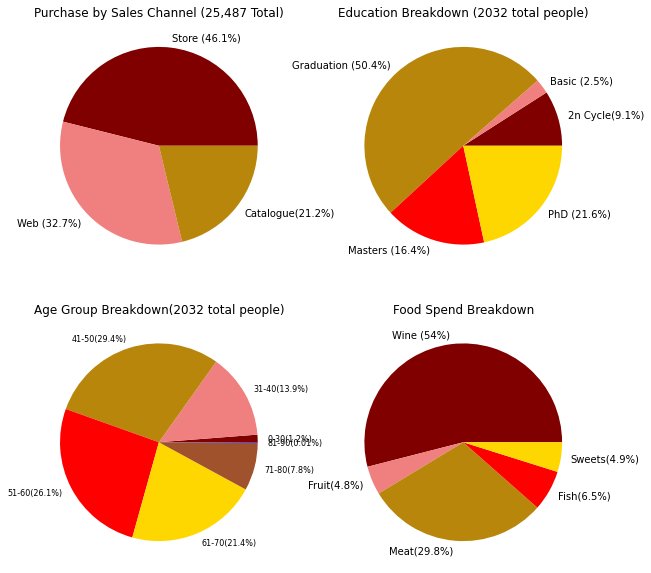

In [3]:
# Dataset Visual Overview 

#all purchases
store_purchase_total= shop_data['numstorepurchases'].sum()
web_purchase_total= shop_data['numwebpurchases'].sum()
catalog_purchase_total= shop_data['numcatalogpurchases'].sum()
total=(store_purchase_total+web_purchase_total+catalog_purchase_total)
#Calculate values
#allpeople 
#age
num_peop= len(shop_data)
ed_counts=shop_data.groupby('education')['id'].count().reset_index()
ed_counts['percent']=ed_counts['id']/num_peop*100

x=np.array(ed_counts['id'])
y= np.array([store_purchase_total, web_purchase_total, catalog_purchase_total])
labels=['Store (46.1%)','Web (32.7%)','Catalogue(21.2%)']

fig, axs = plt.subplots(2,2, figsize=(10,10))
axs[0,0].pie(y, labels=labels, colors=['maroon', 'lightcoral', 'darkgoldenrod'])
axs[0,0].set_title('Purchase by Sales Channel (25,487 Total)')

x=np.array(ed_counts['id'])
labels2= ['2n Cycle(9.1%)','Basic (2.5%)','Graduation (50.4%)','Masters (16.4%)','PhD (21.6%)']
axs[0,1].pie(x,labels=labels2, colors=['maroon', 'lightcoral', 'darkgoldenrod', 'red','gold'])
axs[0,1].set_title('Education Breakdown (2032 total people)')

#education
income_count = shop_data.groupby('age_group')['id'].count().reset_index()
income_count['percent'] = income_count['id']/num_peop*100
z= np.array(income_count['id'])
labels3= ['0-30(1.2%)','31-40(13.9%)','41-50(29.4%)','51-60(26.1%)','61-70(21.4%)','71-80(7.8%)','81-90(0.01%)']
axs[1,0].pie(z, labels=labels3, colors=['maroon', 'lightcoral', 'darkgoldenrod', 'red','gold','sienna','blue'], textprops={'fontsize': 8})
axs[1,0].set_title('Age Group Breakdown(2032 total people)')

#food spend
sumspend_wine= shop_data['winespend'].sum()
sumspend_fruit= shop_data['fruitspend'].sum()
sumspend_meat= shop_data['meatspend'].sum()
sumspend_fish= shop_data['fishspend'].sum()
sumspend_sweets= shop_data['sweetfoodspend'].sum()
sumspend_total= shop_data['totalfoodspend'].sum()

r=np.array([sumspend_wine,sumspend_fruit, sumspend_meat,sumspend_fish, sumspend_sweets])
labels4=['Wine (54%)','Fruit(4.8%)', 'Meat(29.8%)','Fish(6.5%)', 'Sweets(4.9%)']
axs[1,1].pie(r, labels=labels4, colors=['maroon', 'lightcoral', 'darkgoldenrod', 'red','gold'])
axs[1,1].set_title('Food Spend Breakdown')

# Insights:(Overview of Sample)
- There is a relatively even distribution of sales from each of the sales channels (Online, Retail(Store), Catalogue)
- About half of the people included in the survey have a undergraduate degree(graduation) or above (masters, 2nd cycle, Phd).  Those with a basic only constitute 2.5% of the sample and therefore the analysis done on this group should be taken with a grain of salt as this is a sample size of less than 51 people
- Age distribution is fairly even as well with the exception of people 0-30 years old and 81-90 years old.  The analysis drawn from these groups should not be considered robust as the sample size is too small.(less than 24 people). Any analysis of the 81-90 year age range should likely be ignored all together as this sample contains only 2 people and doesn't represent the true population.
- The standout stat from the Food Spend Breakdown is that more than half of the grocery stores revenue comes from wine purchases! This could signify a massive success in their wine business or a sign that they need to increase sales/marketing in their other departments in order to stay competitive.    

# Food Spending by Education Level/ Income Level Analysis
<p>The following visuals look at the relationship between the education levels/Income level and food spending habits of the individuals in the dataset. This information is invaluable to the grocery store in question as they can use these visuals to inform their marketing strategy and/or stocking decisions.

    education        income  totalfoodspend   winespend  fruitspend  \
0       Basic  19913.346939       61.163265    7.795918   11.204082   
1  Graduation  52999.532083      573.015625  284.542969   31.234375   
2    2n Cycle  47309.276243      448.831522  200.755435   28.815217   
3      Master  52982.465257      571.258929  332.738095   21.946429   
4         PhD  56176.725806      634.797267  402.371298   18.892938   

    meatspend  fishspend  sweetfoodspend  
0   11.816327  17.734694       12.612245  
1  181.834961  43.640625       31.762695  
2  139.505435  45.336957       34.418478  
3  162.916667  32.217262       21.440476  
4  167.902050  25.753986       19.876993  


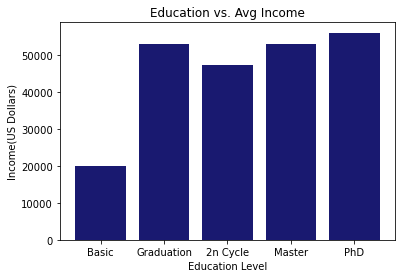

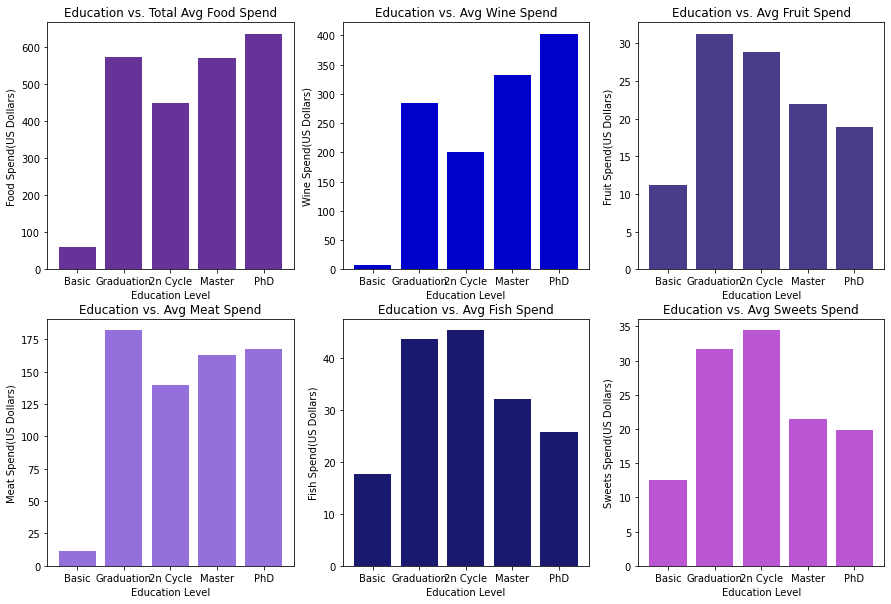

    education        income  totalfoodspend   winespend  fruitspend  \
0       Basic  19913.346939       61.163265    7.795918   11.204082   
1  Graduation  52999.532083      573.015625  284.542969   31.234375   
2    2n Cycle  47309.276243      448.831522  200.755435   28.815217   
3      Master  52982.465257      571.258929  332.738095   21.946429   
4         PhD  56176.725806      634.797267  402.371298   18.892938   

    meatspend  fishspend  sweetfoodspend  
0   11.816327  17.734694       12.612245  
1  181.834961  43.640625       31.762695  
2  139.505435  45.336957       34.418478  
3  162.916667  32.217262       21.440476  
4  167.902050  25.753986       19.876993  


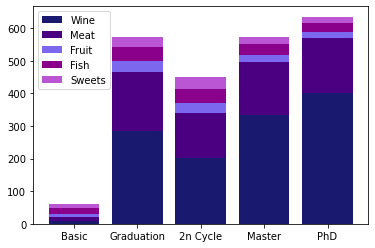

Text(0.5, 1.0, 'Income vs. Total Food Spend Spend')

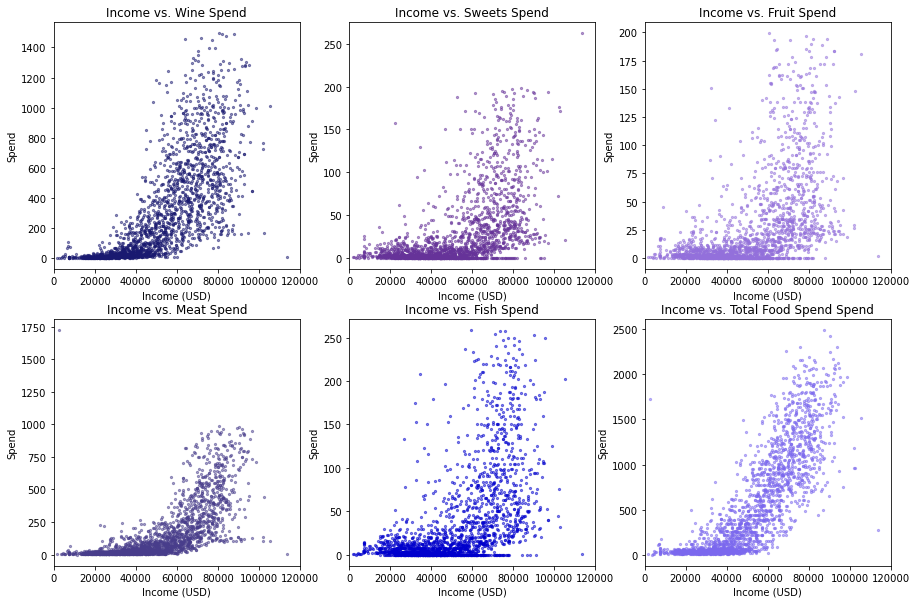

In [4]:
#Education level Analysis/ Income Analysis

#1.) How does total food spending change with education/income? What is the breakdown of spending on each food category by education level? 
#2.) What group drinks the most wine? Eats the most meat/fish/fruit/sweets?
#3.) How does average income change with education level?

#Group data into education categories and calculate basic statistics on those education groups food spending. not very helpful for graphing as it becomes difficult to pull info form this format.
ed_stats_overview = shop_data.groupby('education').agg({'income': ['mean', 'std', 'min', 'max'],
                                               'totalfoodspend': ['mean', 'std', 'min', 'max'],
                                              'winespend': ['mean','std', 'min', 'max'],
                                               'fruitspend': ['mean','std', 'min', 'max'],
                                               'meatspend': ['mean','std', 'min', 'max'],
                                               'fishspend': ['mean','std', 'min', 'max'],
                                               'sweetfoodspend': ['mean','std', 'min', 'max']
                                              }).reset_index()

#reorder the grouped education columns to hav them inorder of increasing sinyority instead of alphabetical order
ed_stats_overview = ed_stats_overview.set_index('education').reindex(['Basic','Graduation','2n Cycle','Master','PhD']).reset_index()


#calculate stats again to make useable for graphs
ed_stats = shop_data.groupby('education')[['income','totalfoodspend','winespend','fruitspend','meatspend','fishspend','sweetfoodspend']].mean().reset_index()
#rearrange education level from lowest to highest
ed_stats = ed_stats.set_index('education').reindex(['Basic','Graduation','2n Cycle','Master','PhD']).reset_index()
print(ed_stats)

#graph relationships 
plt.bar(ed_stats['education'], ed_stats['income'], color='midnightblue')
plt.title('Education vs. Avg Income')
plt.xlabel('Education Level')
plt.ylabel('Income(US Dollars)')
plt.show

#this plt. subplot command allows me to group multiple plots together based on a 2 columns and 3 rows)
fig,axs = plt.subplots(2,3, figsize=(15,10))
axs[0,0].bar(ed_stats['education'], ed_stats['totalfoodspend'], color='rebeccapurple')
axs[0,0].set_title('Education vs. Total Avg Food Spend')
axs[0,0].set_xlabel('Education Level')
axs[0,0].set_ylabel('Food Spend(US Dollars)')

axs[0,1].bar(ed_stats['education'], ed_stats['winespend'], color='mediumblue')
axs[0,1].set_title('Education vs. Avg Wine Spend')
axs[0,1].set_xlabel('Education Level')
axs[0,1].set_ylabel('Wine Spend(US Dollars)')

axs[0,2].bar(ed_stats['education'], ed_stats['fruitspend'], color='darkslateblue')
axs[0,2].set_title('Education vs. Avg Fruit Spend')
axs[0,2].set_xlabel('Education Level')
axs[0,2].set_ylabel('Fruit Spend(US Dollars)')

axs[1,0].bar(ed_stats['education'], ed_stats['meatspend'], color='mediumpurple')
axs[1,0].set_title('Education vs. Avg Meat Spend')
axs[1,0].set_xlabel('Education Level')
axs[1,0].set_ylabel('Meat Spend(US Dollars)')

axs[1,1].bar(ed_stats['education'], ed_stats['fishspend'], color='midnightblue')
axs[1,1].set_title('Education vs. Avg Fish Spend')
axs[1,1].set_xlabel('Education Level')
axs[1,1].set_ylabel('Fish Spend(US Dollars)')

axs[1,2].bar(ed_stats['education'], ed_stats['sweetfoodspend'], color='mediumorchid')
axs[1,2].set_title('Education vs. Avg Sweets Spend')
axs[1,2].set_xlabel('Education Level')
axs[1,2].set_ylabel('Sweets Spend(US Dollars)')
plt.show()

print(ed_stats)
#creates a bar chart that shows total average food spend for each educational group and subdivides it into food categoies.
plt.bar(ed_stats['education'], ed_stats['winespend'],label='Wine', color='midnightblue')
plt.bar(ed_stats['education'], ed_stats['meatspend'], label='Meat', bottom=ed_stats['winespend'], color='indigo')
plt.bar(ed_stats['education'], ed_stats['fruitspend'], label='Fruit', bottom=ed_stats['winespend']+ed_stats['meatspend'], color='mediumslateblue')
plt.bar(ed_stats['education'], ed_stats['fishspend'], label='Fish', bottom=ed_stats['fruitspend']+ed_stats['winespend']+ed_stats['meatspend'], color='darkmagenta')
plt.bar(ed_stats['education'], ed_stats['sweetfoodspend'], label='Sweets', bottom=ed_stats['fruitspend']+ed_stats['winespend']+ed_stats['meatspend']+ed_stats['fishspend'], color='mediumorchid')
plt.legend()
plt.show()

#Here i'll look at incomes influence on food spend.  
#we chose to only look at the income under 120000 USD because there arent many earners making more than that and it becomes hard to visualize the data if we do so.
fig, axs = plt.subplots(2,3, figsize=(15,10))
axs[0,0].scatter(shop_data['income'], shop_data['winespend'], alpha=0.5, s=5, color='midnightblue')
axs[0,0].set_xlim(0, 120000)
axs[0,0].set_xlabel('Income (USD)')
axs[0,0].set_ylabel('Spend')
axs[0,0].set_title('Income vs. Wine Spend')

axs[0,1].scatter(shop_data['income'], shop_data['sweetfoodspend'], alpha=0.5, s=5, color='rebeccapurple')
axs[0,1].set_xlim(0, 120000)
axs[0,1].set_xlabel('Income (USD)')
axs[0,1].set_ylabel('Spend')
axs[0,1].set_title('Income vs. Sweets Spend')

axs[0,2].scatter(shop_data['income'], shop_data['fruitspend'], alpha=0.5, s=5, color='mediumpurple')
axs[0,2].set_xlim(0, 120000)
axs[0,2].set_xlabel('Income (USD)')
axs[0,2].set_ylabel('Spend')
axs[0,2].set_title('Income vs. Fruit Spend')

axs[1,0].scatter(shop_data['income'], shop_data['meatspend'], alpha=0.5, s=5, color='darkslateblue')
axs[1,0].set_xlim(0, 120000)
axs[1,0].set_xlabel('Income (USD)')
axs[1,0].set_ylabel('Spend')
axs[1,0].set_title('Income vs. Meat Spend')

axs[1,1].scatter(shop_data['income'], shop_data['fishspend'], alpha=0.5, s=5, color='mediumblue')
axs[1,1].set_xlim(0, 120000)
axs[1,1].set_xlabel('Income (USD)')
axs[1,1].set_ylabel('Spend')
axs[1,1].set_title('Income vs. Fish Spend')

axs[1,2].scatter(shop_data['income'], shop_data['totalfoodspend'], alpha=0.5, s=5, color='mediumslateblue')
axs[1,2].set_xlim(0, 120000)
axs[1,2].set_xlabel('Income (USD)')
axs[1,2].set_ylabel('Spend')
axs[1,2].set_title('Income vs. Total Food Spend Spend')




# Insights: Food Spending by Education Level/Income Level 
- While income did increase with education level, I was surprised that it did not increase as much as I would have expected.  Also the difference in average income between college graduates and those with a master’s degree is negligible.
- The amount of money spent by those with a basic education is drastically less than other groups.  While lower education often translates to lower salary, this group also likely buys more of their total diet at the grocery store as eating out is more expensive.  So what’s the reason for this massive jump in spending? Does the grocery store cater more to wealthy people (i.e. Whole Foods, Erewhon)?  This would make sense based on the percentage of their revenue that comes from wine. Do they need to increase their marketing effort to the blue collar demographic? More information from the company is necessary to answer that question.
- We see and increase in wine and meat consumption among the most educated groups (Masters, PhD) but a decrease in fish and sweets consumption.  Not sure as to the reason for this trend but perhaps further analysis or data collection could shed some light on this. 
- Across all education levels, with the exception of basic, the vast majority of store revenue is coming from meat and wine products.  It would be interesting to see a breakdown of what types of meat/wine customers are purchasing and how those habits change over time. 
- In the lower scatterplots we can see that as individuals earn more, they begin to spend more money in each of the 5 food categories in the dataset. No surprise here.  What is surprising is the sharp increase in spending we see around 50k or more in income per year.  As income rises above 50k we see a sharp increase in spending that continues to trend upwards in each food category. It would be great if my had more data on earners making more than 100k a year. Would this steep increase in spending continue past that point? You can only eat so much food, no matter your income, but perhaps those with more money simply buy much more expensive items and continue to increase their grocery budget with their income.  It would be fantastic to have more data on specific grocery store items and their price points to investigate this hypothesis.   

# Food Spending by Age Group Analysis
The code below attempts to find out how food buying habits changed based on purchasers age. individuals were grouped into age ranges of 10 years (31-40, 41-50, etc).  Those aged 0-30 years old were grouped into one group due to the lack of individuals in this age range. Even with that grouping there were less than 25 total individuals in the 0-30 sample, which calls into question any analysis rendered from the sample.  Also, the 81-90 grouping included only 2 individuals, rendering the grouping almost useless and certainly not an accurate representation of the total population. That being said the other groups have plenty of data and allow us to draw interesting conclusion from the dataset.  

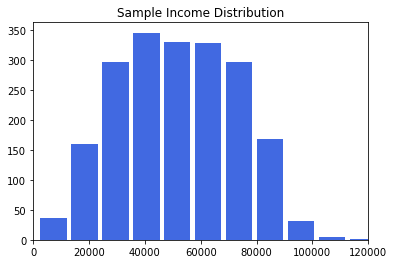

0


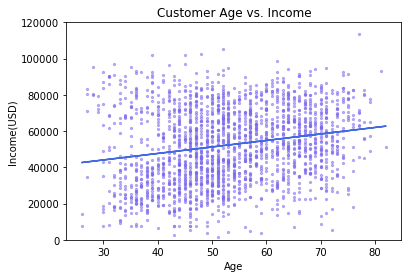

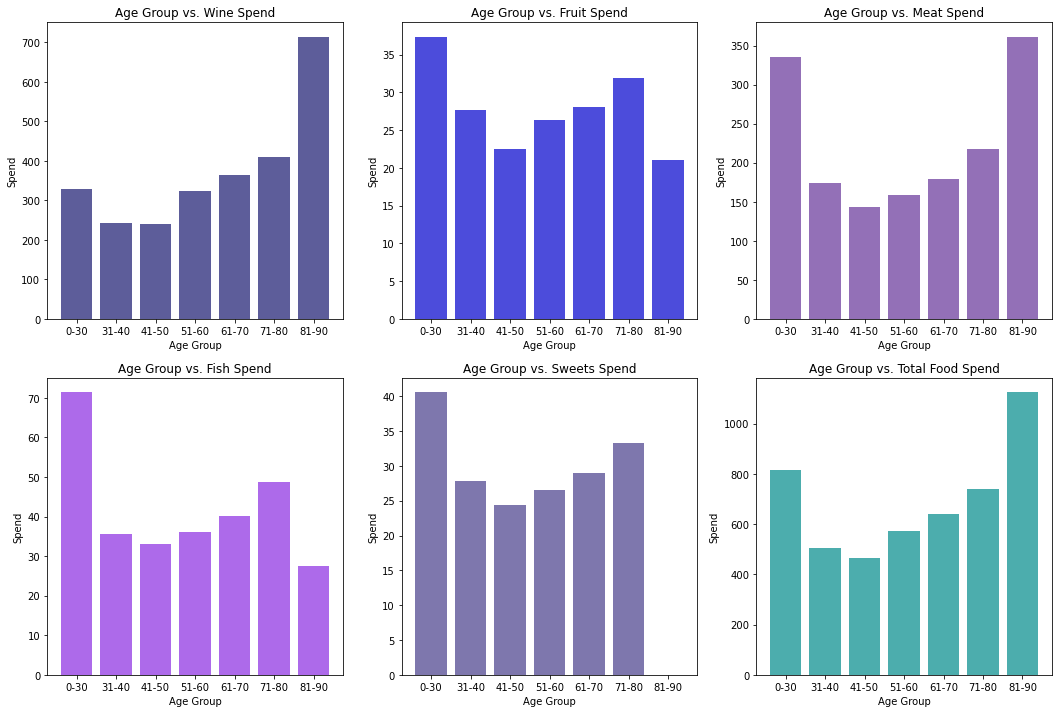

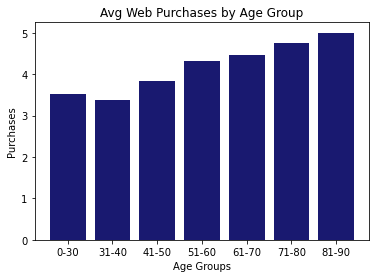

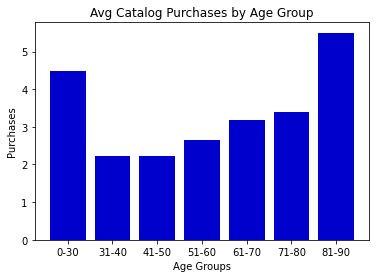

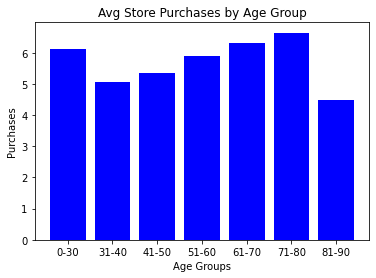

In [5]:
#Age analysis

#Questions:
#1.) What age group makes most purchases from catalog, website, or store? 

#First lets look at a distribution of income in the dataset
plt.hist(shop_data['income'], bins=60, rwidth=0.85, color='royalblue')
plt.xlim(0,120000)
plt.title('Sample Income Distribution')
plt.show()

sd_income=shop_data.dropna(subset=['income'])
print(len(sd_income[sd_income['income'].isnull()]))
m,b= np.polyfit(sd_income['age'], sd_income['income'], 1)
plt.scatter(sd_income['age'], sd_income['income'], alpha=0.5, s=5, color='mediumslateblue')
plt.plot(sd_income['age'], m*sd_income['age']+b, color='royalblue')
plt.xlabel('Age')
plt.ylabel('Income(USD)')
plt.ylim(0, 120000)
plt.title('Customer Age vs. Income')
plt.show()


#use the above categories to look at food spending habits by age group
foodspend_age = shop_data.groupby('age_group')[['income','totalfoodspend','winespend','fruitspend','meatspend','fishspend','sweetfoodspend']].mean().reindex(['0-30','31-40','41-50','51-60','61-70','71-80','81-90']).reset_index()

fig, axs= plt.subplots(2,3, figsize=(18,12))
axs[0,0].bar(foodspend_age['age_group'], foodspend_age['winespend'], alpha=0.7, color='midnightblue')
axs[0,0].set_xlabel('Age Group')
axs[0,0].set_ylabel('Spend')
axs[0,0].set_title('Age Group vs. Wine Spend')

axs[0,1].bar(foodspend_age['age_group'], foodspend_age['fruitspend'], alpha=0.7, color='mediumblue')
axs[0,1].set_xlabel('Age Group')
axs[0,1].set_ylabel('Spend')
axs[0,1].set_title('Age Group vs. Fruit Spend')

axs[0,2].bar(foodspend_age['age_group'], foodspend_age['meatspend'], alpha=0.7, color='rebeccapurple')
axs[0,2].set_xlabel('Age Group')
axs[0,2].set_ylabel('Spend')
axs[0,2].set_title('Age Group vs. Meat Spend')

axs[1,0].bar(foodspend_age['age_group'], foodspend_age['fishspend'], alpha=0.7, color='blueviolet')
axs[1,0].set_xlabel('Age Group')
axs[1,0].set_ylabel('Spend')
axs[1,0].set_title('Age Group vs. Fish Spend')

axs[1,1].bar(foodspend_age['age_group'], foodspend_age['sweetfoodspend'], alpha=0.7, color='darkslateblue')
axs[1,1].set_xlabel('Age Group')
axs[1,1].set_ylabel('Spend')
axs[1,1].set_title('Age Group vs. Sweets Spend')

axs[1,2].bar(foodspend_age['age_group'], foodspend_age['totalfoodspend'], alpha=0.7, color='darkcyan')
axs[1,2].set_xlabel('Age Group')
axs[1,2].set_ylabel('Spend')
axs[1,2].set_title('Age Group vs. Total Food Spend')
plt.show()


#next well look at online vs in store, vs catalogue purchases by age group
#first lets get an overview
saleschannel_age = shop_data.groupby('age_group')[['numwebpurchases','numcatalogpurchases','numstorepurchases']].mean().reindex(['0-30','31-40','41-50','51-60','61-70','71-80','81-90']).reset_index()

plt.bar(saleschannel_age['age_group'], saleschannel_age['numwebpurchases'], color='midnightblue')
plt.title('Avg Web Purchases by Age Group')
plt.ylabel('Purchases')
plt.xlabel('Age Groups')
plt.show()
plt.bar(saleschannel_age['age_group'], saleschannel_age['numcatalogpurchases'], color='mediumblue')
plt.title('Avg Catalog Purchases by Age Group')
plt.ylabel('Purchases')
plt.xlabel('Age Groups')
plt.show()
plt.bar(saleschannel_age['age_group'], saleschannel_age['numstorepurchases'], color='blue')
plt.title('Avg Store Purchases by Age Group')
plt.ylabel('Purchases')
plt.xlabel('Age Groups')
plt.show()

# Insights: Food Spending by Age Group Analysis (0-30 and 81-90 groups ignored dues to small sample size)
- We see an positive relationship between increasing age and increasing income. One thing that surprised me is that there doesn’t seem to be a significant decrease in income after retirement age (US average is 61).  This could support the earlier hypothesis that this grocery store caters to wealthy clients as perhaps these older earners have passive income streams that continue earning for them after retirement.  However this needs to be investigated further. 
- We see a steady increase in spending from age 41-80 across all food categories and sales channels, with older buyers both spending more in total and purchasing more individual items at the store, online, and out of the catalog.  Perhaps a sign that older individuals have more disposable income
- the 41-50 age demographic spends the least in each of the food categories included int he data set.  Why might this be? This could be the age range where people have a reasonable income and are still young enough to enjoy going out to restaurants often with friends and colleagues, therefore they eat out more and buy less groceries? Would need more data to definitively draw this conclusion. age 31-40 spend slightly more that the 41-50 demo which could provide weak support for this hypothesis.

# Sales Channel and Web Visits Analysis
The code below visualizes the relationship between the sales across various sales channels (website, instore, and catalogue) and website visits.  One of the datapoints tracked in this original data set is the number of times each customer visited the grocery store website that month.  The data set also includes the number of purchases (each individual item counted as one purchase) per customer per month. if we find a clear relationship between these variables it would be very helpful to the grocery stores digital marketing team.

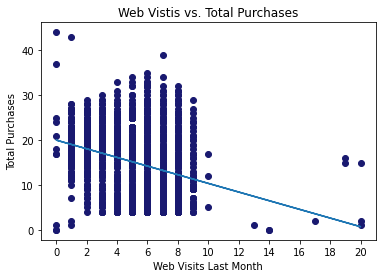

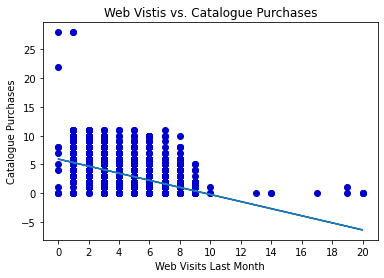

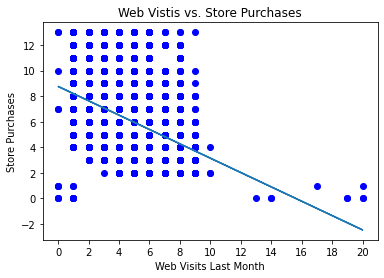

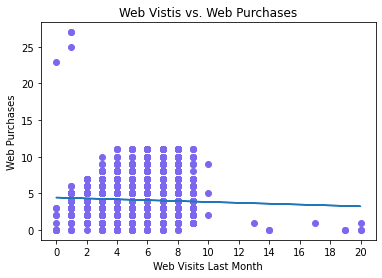

In [6]:

m,b=np.polyfit(shop_data['webvisitsmonth'], shop_data['totalpurchases'], 1)
plt.scatter(shop_data['webvisitsmonth'], shop_data['totalpurchases'], color='midnightblue')
plt.plot(shop_data['webvisitsmonth'], m*shop_data['webvisitsmonth']+b)
plt.title('Web Vistis vs. Total Purchases')
plt.ylabel('Total Purchases')
plt.xlabel('Web Visits Last Month')
plt.xticks(ticks=[0,2,4,6,8,10,12,14,16,18,20])
plt.show()

m,b=np.polyfit(shop_data['webvisitsmonth'], shop_data['numcatalogpurchases'], 1)
plt.scatter(shop_data['webvisitsmonth'], shop_data['numcatalogpurchases'], color='mediumblue')
plt.plot(shop_data['webvisitsmonth'], m*shop_data['webvisitsmonth']+b)
plt.title('Web Vistis vs. Catalogue Purchases')
plt.ylabel('Catalogue Purchases')
plt.xlabel('Web Visits Last Month')
plt.xticks(ticks=[0,2,4,6,8,10,12,14,16,18,20])
plt.show()

m,b=np.polyfit(shop_data['webvisitsmonth'], shop_data['numstorepurchases'], 1)
plt.scatter(shop_data['webvisitsmonth'], shop_data['numstorepurchases'], color='blue')
plt.plot(shop_data['webvisitsmonth'], m*shop_data['webvisitsmonth']+b)
plt.title('Web Vistis vs. Store Purchases')
plt.ylabel('Store Purchases')
plt.xlabel('Web Visits Last Month')
plt.xticks(ticks=[0,2,4,6,8,10,12,14,16,18,20])
plt.show()

m,b=np.polyfit(shop_data['webvisitsmonth'], shop_data['numwebpurchases'], 1)
plt.scatter(shop_data['webvisitsmonth'], shop_data['numwebpurchases'], color='mediumslateblue')
plt.plot(shop_data['webvisitsmonth'], m*shop_data['webvisitsmonth']+b)
plt.title('Web Vistis vs. Web Purchases')
plt.ylabel('Web Purchases')
plt.xlabel('Web Visits Last Month')
plt.xticks(ticks=[0,2,4,6,8,10,12,14,16,18,20])
plt.show()

# Insight: Sales Channel and Web Visits Analysis 
- No clear positive correlation between increasing website visits and increasing sales in  any of the sales channels tracked. 
- There are interesting outliers in the data set. those who visited the website very little or not at all but purchased more items than anyone else, and customers who visited the website 15+ times but made 5 or less purchases (much lower than customer average).  It would be great to investigate these datapoints more to determine why their buying/web surfing habits differ so greatly from the majority of customers included in the dataset.